# Data Science Final Generic Assignment

In [140]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split as split

import time
from sklearn.metrics import accuracy_score
# KNNs
from sklearn.neighbors import KNeighborsClassifier as KNNC
from sklearn.neighbors import KNeighborsRegressor as KNNR
# NaiveBayes
from sklearn.naive_bayes import GaussianNB as NB
# Tree
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.tree import DecisionTreeRegressor as DTR
# Tree plot
from sklearn.tree import plot_tree
# Random Forest
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import RandomForestRegressor as RFR
# Logisitic/Linear Regression
from sklearn.linear_model import LogisticRegression as LC
from sklearn.linear_model import LinearRegression as LR

#Clustering
from sklearn.cluster import KMeans
%matplotlib inline
import matplotlib.pyplot as plt

In [123]:
import seaborn as sns
sns.set()

## Code For Analysis

In [62]:
def getModelDetails(X_train, y_train, X_test, y_test, model, metric, **args):
    st = time.time()
    y_pred = model().fit(X_train, y_train).predict(X_test)
    rTime = time.time() - st
    return (metric(y_test, y_pred), rTime)

def getModelTimeAndAccuracies(models, score, X_train, y_train, X_test, y_test, learning = "C"):
    results = []
    for model in models:
        results.append(
            getModelDetails(
                X_train, y_train, X_test, y_test,
                eval(model["name"] + learning if model["name"] != "NB" else model["name"]),
                score,
                **model["params"]
            )
        )
    return results

## Code for Results display

In [82]:
def printResults(results, models):
    for result, model in zip(results, models):
        print("{}: {:0.2f}%, {:0.4f}s".format(model["name"], result[0]*100, result[1]))

## KNN-Tuning

In [454]:
def plotKNN(model, score, X_train, y_train, X_test, y_test):
    acc = []
    for i in range(1,11):
        acc.append(
            score(y_test, model(n_jobs=-1, n_neighbors=i).fit(X_train, y_train).predict(X_test))
        )
    plt.figure(figsize=(16,8))
    plt.xticks(range(1,11))
    plt.ylim(min(acc)-0.1,max(acc)+0.1)
    plt.xlim(0,11)
    plt.title("K-NN plot")
    plt.xlabel("K")
    plt.ylabel("Accuracy")
    t = plt.plot([acc[0]]+acc, marker='o', color="r")

### UTILS

In [348]:
def savePlt(plot, name):
    plot.savefig(f'./DSFA/{name}.png',bbox_inches='tight')

In [593]:
def mapFeature(feature):
    unq = feature.unique().tolist()
    return feature.apply(lambda x: unq.index(x))

## SKIN Segmentation Dataset

In [626]:
df = pd.read_csv('./DSFA/Skin Segmentation/Skin_NonSkin.txt', sep='\t')

In [627]:
df.columns = ["R", "G", "B", "label"]

In [628]:
df.head()

,R,G,B,label
0,73,84,122,1
1,72,83,121,1
2,70,81,119,1
3,70,81,119,1
4,69,80,118,1


In [629]:
X = df.iloc[:,:-1]

In [630]:
y = df.iloc[:,-1]

In [631]:
X = X/(X.max()-X.min())

In [632]:
y

0         1
1         1
2         1
3         1
4         1
         ..
245051    2
245052    2
245053    2
245054    2
245055    2
Name: label, Length: 245056, dtype: int64

In [633]:
X_train, X_test, y_train, y_test = split(X, y, test_size=0.2, random_state=42)

In [634]:
score = accuracy_score

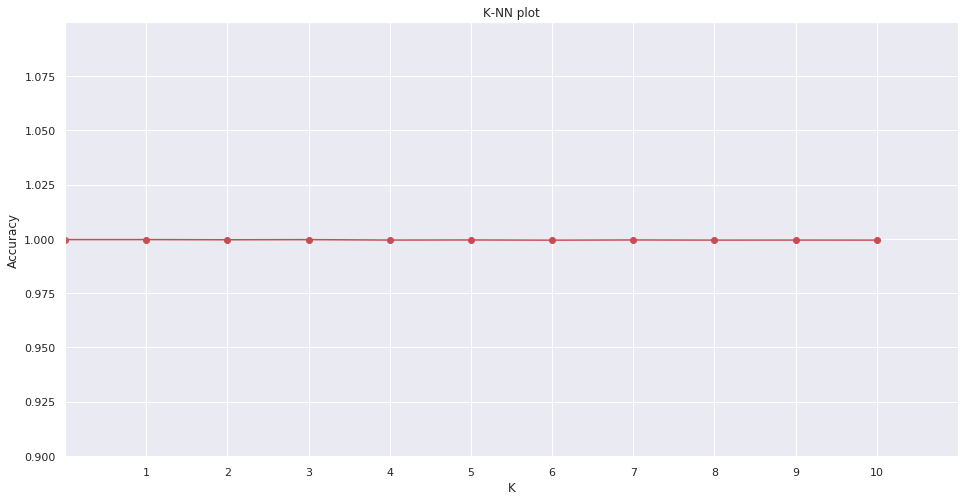

In [636]:
plotKNN(KNNC, score, X_train, y_train, X_test, y_test)
savePlt(name="skinKNN", plot=plt)

In this case K doesn't really matter that much but we'll use k = 1 for less error rate.

In [ ]:
models = [
        {"name": "KNN", "params": {"n_jobs": -1, "n_neighbours": 1}},
        {"name": "NB", "params": {"random_state": 42}},
        {"name": "DT", "params": {"random_state": 42}},
        {"name": "RF", "params": {"n_estimators": 20, "random_state": 42}}
]
results = getModelTimeAndAccuracies(
    models,
    score,
    X_train, y_train, X_test, y_test)

### RESULT

In [484]:
printResults(results, models)

KNN: 99.95%, 1.2544s
NB: 92.50%, 0.0199s
DT: 99.94%, 0.1354s
RF: 99.97%, 5.0217s


### Clustering

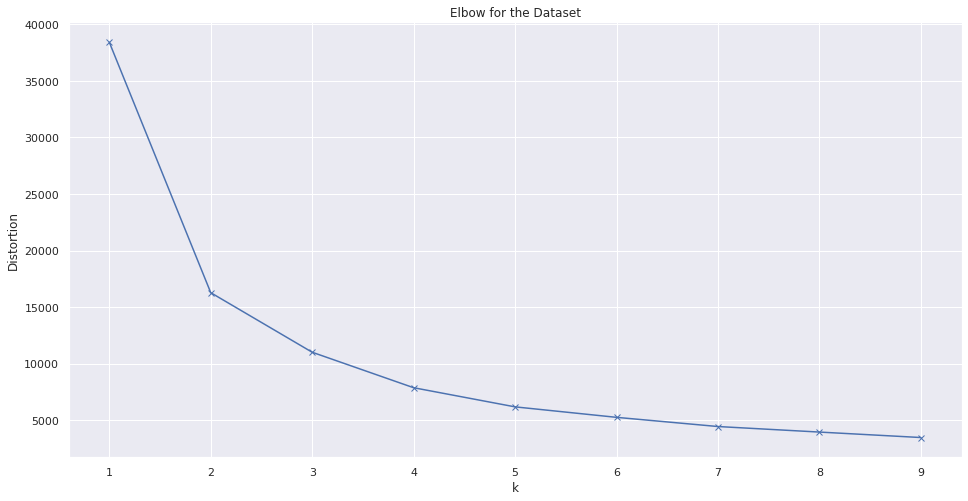

In [124]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_train)
    distortions.append(kmeanModel.inertia_)

def savePlt(plot, name):
    plot.savefig(f'./DSFA/{name}.png',bbox_inches='tight')

plt.figure(figsize=(16,8))
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow for the Dataset')
plt.plot(K, distortions, 'bx-')
savePlt(plt, "skinElbow")

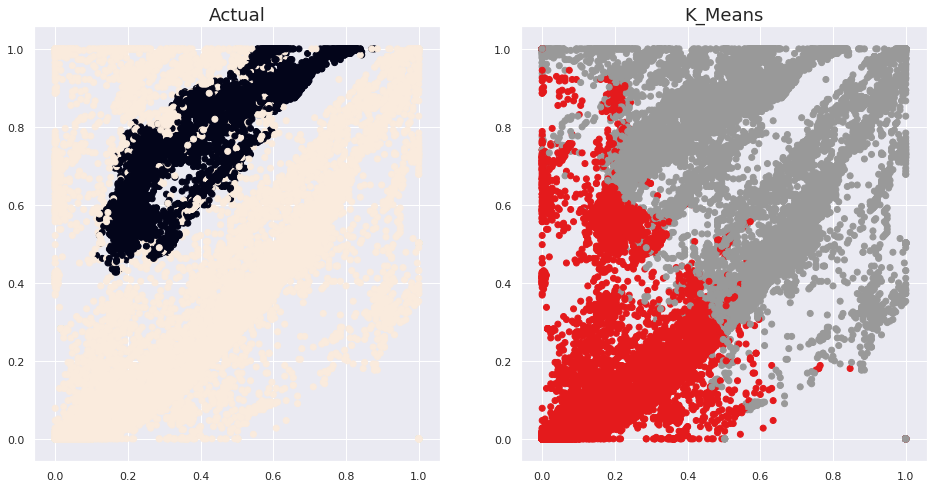

In [125]:
kmeanModel = KMeans(n_clusters=2)
kmeanModel.fit(X_train)

k_means=kmeanModel.predict(X_test)
target=y_test
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X_test.loc[:,"R"], X_test.loc[:,"B"], c=target)
axes[1].scatter(X_test.loc[:,"R"], X_test.loc[:,"B"], c=k_means, cmap=plt.cm.Set1)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('K_Means', fontsize=18)

savePlt(plt, "skinKMeans")

## BikeSharing Dataset

In [613]:
df = pd.read_csv("./DSFA/Bike-Sharing-Dataset/day.csv")

In [614]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [615]:
dateyr=df["dteday"].apply(lambda x: int(x.split("-")[0]))

In [616]:
datemo=df["dteday"].apply(lambda x: int(x.split("-")[1]))

In [617]:
dateday=df["dteday"].apply(lambda x: int(x.split("-")[2]))

In [618]:
df.insert(2, "dateyr", dateyr)
df.insert(3, "datemo", datemo)
df.insert(4, "dateday", dateday)

In [619]:
df = df.drop(columns=["dteday"])

In [620]:
df.head()

,instant,dateyr,datemo,dateday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011,1,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011,1,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011,1,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011,1,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011,1,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [621]:
X_train, X_test, y_train, y_test = split(df.iloc[:, :-1], df.iloc[:,-1], test_size=0.33, random_state=42)

In [622]:
from sklearn.metrics import r2_score
score = r2_score 

### Neighbour Tuning

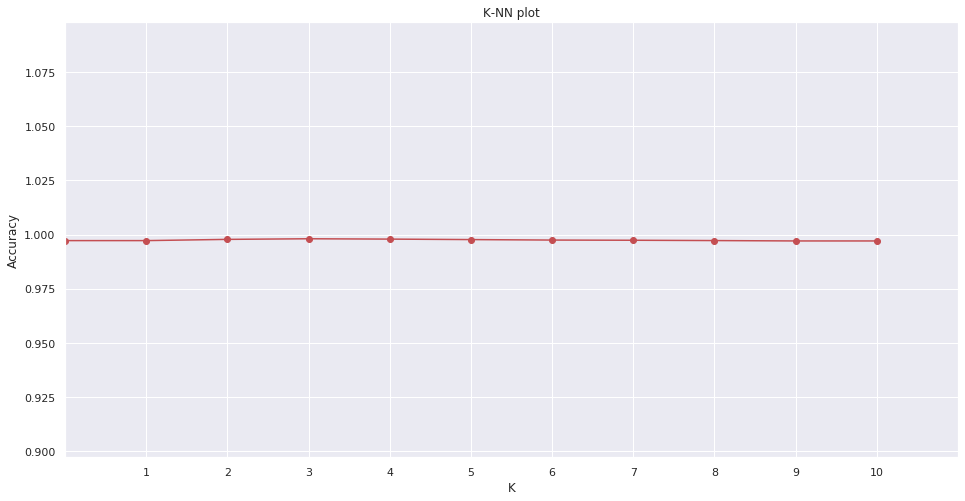

In [623]:
plotKNN(KNNR, score, X_train, y_train, X_test, y_test)
savePlt(plot=plt, name="bikeKNN")

In this case k doesn't really matter that much...

In [624]:
models = [
        {"name": "KNN", "params": {"n_jobs": -1, "n_neighbours": 3}},
        {"name": "NB", "params": {"random_state": 42}},
        {"name": "DT", "params": {"random_state": 42}},
        {"name": "L", "params": {"n_jobs": -1, "random_state": 42}},
        {"name": "RF", "params": {"n_estimators": 20, "random_state": 42}}
]
results = getModelTimeAndAccuracies(
    models,
    score,
    X_train, y_train, X_test, y_test, "R")

### RESULT

In [625]:
printResults(results, models)

KNN: 99.77%, 0.0033s
NB: 48.68%, 0.0353s
DT: 98.38%, 0.0038s
L: 100.00%, 0.0015s
RF: 99.60%, 0.2169s


### Clustering

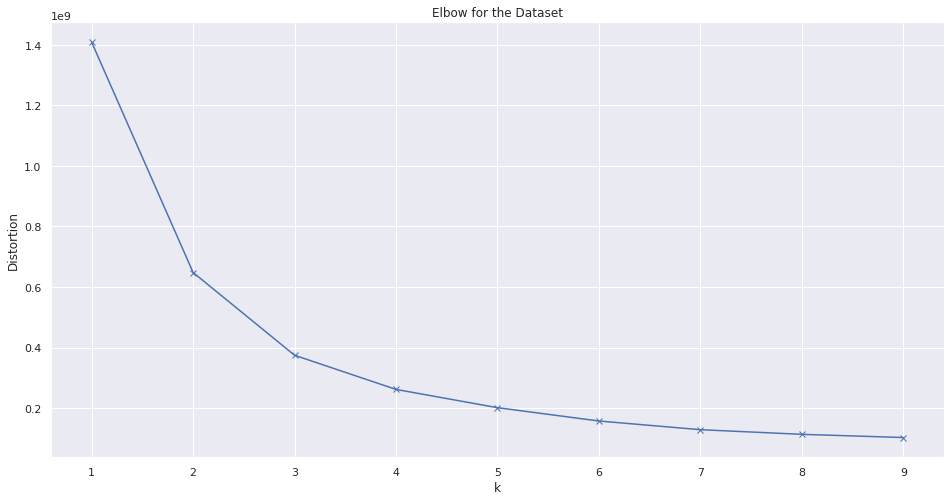

In [273]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_train)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow for the Dataset')
plt.plot(K, distortions, 'bx-')
savePlt(plt, "bikeElbow")

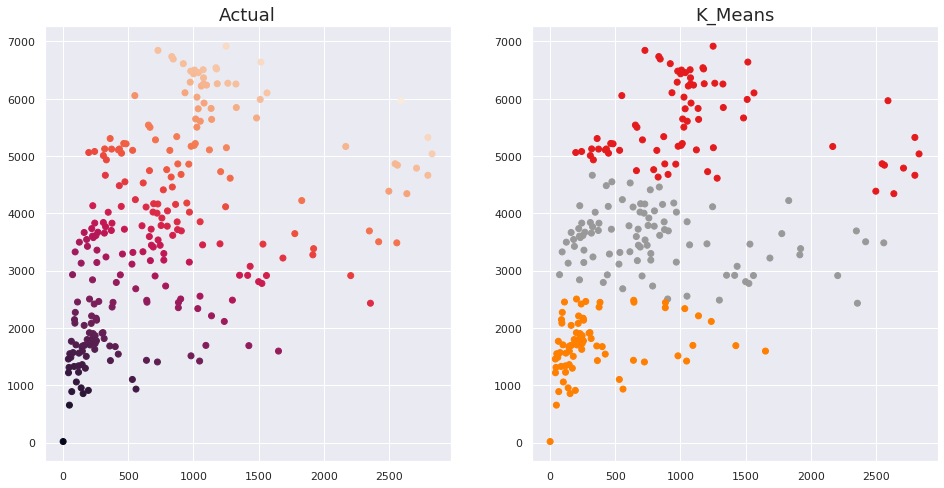

In [280]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(X_train)

k_means=kmeanModel.predict(X_test)
target=y_test
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X_test.loc[:,"casual"], X_test.loc[:,"registered"], c=target)
axes[1].scatter(X_test.loc[:,"casual"], X_test.loc[:,"registered"], c=k_means, cmap=plt.cm.Set1)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('K_Means', fontsize=18)

savePlt(plt, "bikeKMeans")

## Dota2 Games Result Dataset

In [532]:
train = pd.read_csv("./DSFA/dota2Dataset/dota2Train.csv")

In [533]:
test = pd.read_csv("./DSFA/dota2Dataset/dota2Test.csv")

In [534]:
for i in train:
    if (not train[i].values.any()):
        print(i)

0.19
0.97


In [535]:
for i in test:
    if (not test[i].values.any()):
        print(i)

0.21
0.97


In [536]:
train = train.drop(columns=["0.97"])

In [537]:
test = test.drop(columns=["0.97"])

In [538]:
train["223"] = train["223"]/(train["223"].max()-train["223"].min())

In [539]:
test["223"] = test["223"]/(test["223"].max()-test["223"].min())

In [540]:
X_train, y_train = (train.iloc[:,1:], train.iloc[:,0])

In [541]:
X_test, y_test = (test.iloc[:,1:], test.iloc[:,0])

In [542]:
score = accuracy_score

In [543]:
X_train.head()

,223,2,2.1,0,0.1,0.2,0.3,0.4,0.5,0.6,...,0.92,0.93,0.94,0.95,0.96,0.98,0.99,0.100,0.101,0.102
0,1.013333,2,2,0,0,0,1,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
1,0.873333,2,2,0,0,0,1,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
2,1.026667,2,2,0,0,0,0,0,0,-1,...,0,-1,0,0,0,0,0,0,0,0
3,1.140000,2,3,0,0,0,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
4,0.813333,2,3,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,-1


### Neighbour Tuning

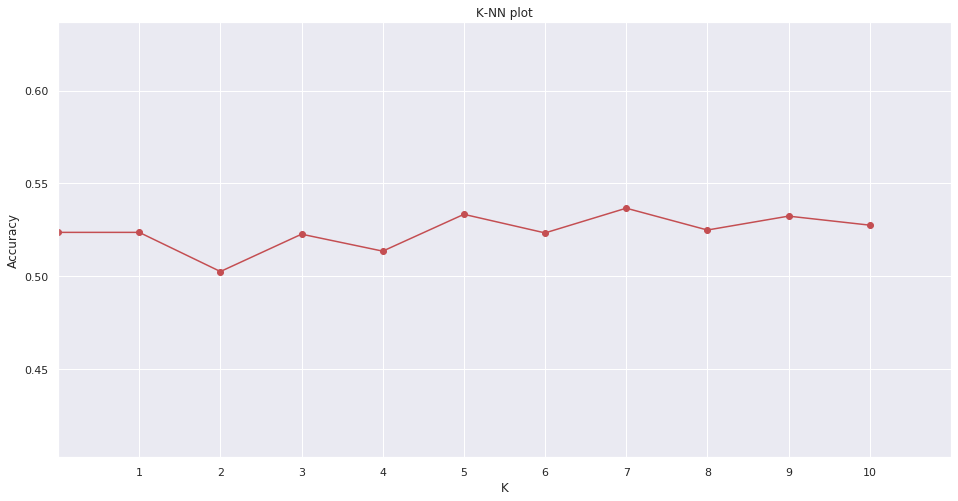

In [551]:
plotKNN(KNNC, score, X_train, y_train, X_test, y_test)
savePlt(name="Dota2KNN", plot=plt)

In [552]:
models = [
        {"name": "KNN", "params": {"n_jobs": -1, "n_neighbors": 7}},
        {"name": "NB", "params": {"random_state": 42}},
        {"name": "DT", "params": {"random_state": 42}},
        {"name": "RF", "params": {"n_estimators": len(X_train.columns)*2, "random_state": 42}}
]
results = getModelTimeAndAccuracies(
    models,
    score,
    X_train, y_train, X_test, y_test)

In [553]:
printResults(results, models)

KNN: 53.34%, 148.6864s
NB: 56.44%, 0.1652s
DT: 51.82%, 2.6322s
RF: 57.83%, 20.6384s


### Clustering

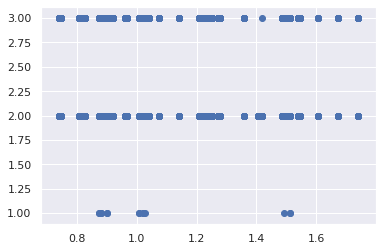

In [554]:
t = plt.scatter(X_train["223"], X_train["2.1"])

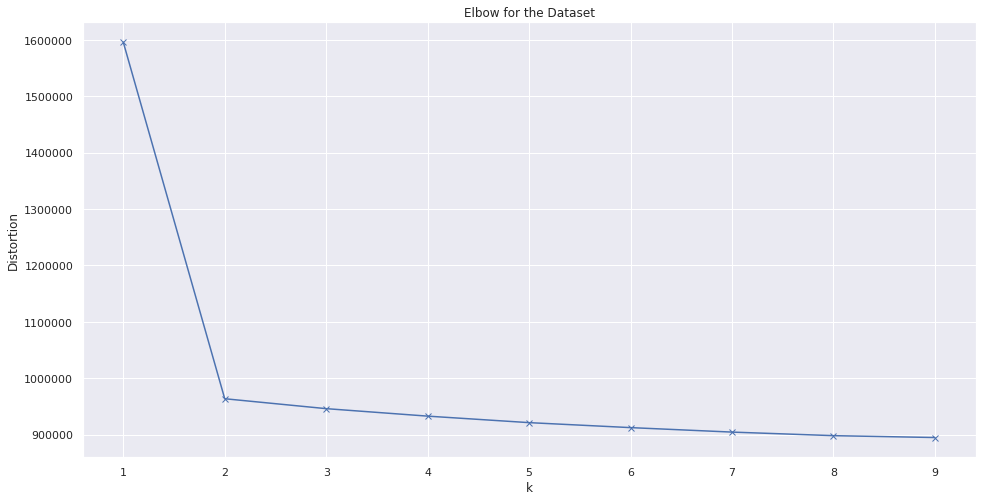

In [555]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_train)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow for the Dataset')
plt.plot(K, distortions, 'bx-')
savePlt(plt, "dota2Elbow")

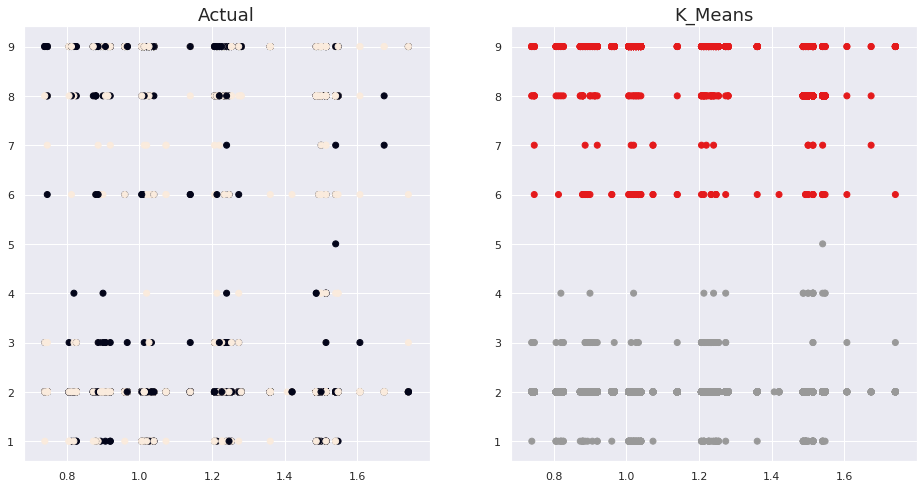

In [556]:
t = kmeanModel = KMeans(n_clusters=2)
t = kmeanModel.fit(X_train)

k_means=kmeanModel.predict(X_test)
target=y_test
fig, axes = plt.subplots(1, 2, figsize=(16,8))
t = axes[0].scatter(X_test["223"], X_test["8"], c=target)
t = axes[1].scatter(X_test["223"], X_test["8"], c=k_means, cmap=plt.cm.Set1)
t = axes[0].set_title('Actual', fontsize=18)
t = axes[1].set_title('K_Means', fontsize=18)

savePlt(plt, "dota2KMeans")

## Statlog Dataset

In [557]:
df = pd.read_csv("./DSFA/Statlog/australian.dat", sep=" ")

In [558]:
df.head()

,1,22.08,11.46,2,4,4.1,1.585,0,0.1,0.2,1.1,2.1,100,1213,0.3
0,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
1,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
2,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
3,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
4,0,15.83,0.585,2,8,8,1.500,1,1,2,0,2,100,1,1


In [559]:
df.columns = list(map(lambda x: f"A{x}", range(1,16)))

In [560]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
1,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
2,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
3,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
4,0,15.83,0.585,2,8,8,1.500,1,1,2,0,2,100,1,1


In [562]:
X = df.iloc[:,:-1]

In [563]:
y = df.iloc[:, -1]

In [564]:
X_train, X_test, y_train, y_test = split(X, y, test_size=0.2, random_state=42)

In [565]:
score = accuracy_score

### Neighbour tuning

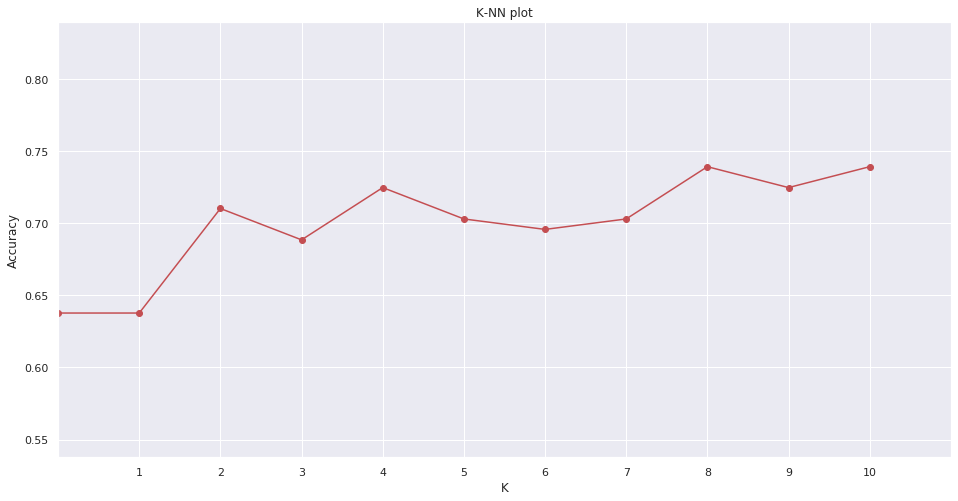

In [566]:
plotKNN(KNNC, score, X_train, y_train, X_test, y_test)
savePlt(plot=plt, name="statlogKNN")

## RESULT

In [567]:
models = [
        {"name": "KNN", "params": {"n_jobs": -1, "n_neighbors": 10}},
        {"name": "NB", "params": {"random_state": 42}},
        {"name": "DT", "params": {"random_state": 42}},
        {"name": "RF", "params": {"n_estimators": len(X_train.columns)*2, "random_state": 42}}
]
results = getModelTimeAndAccuracies(
    models,
    score,
    X_train, y_train, X_test, y_test)

In [568]:
printResults(results, models)

KNN: 70.29%, 0.0067s
NB: 81.88%, 0.0025s
DT: 86.96%, 0.0027s
RF: 86.96%, 0.1194s


## Clustering

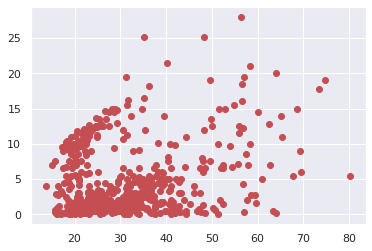

In [569]:
t = plt.scatter(X_train["A2"], X_train["A3"], color="r")

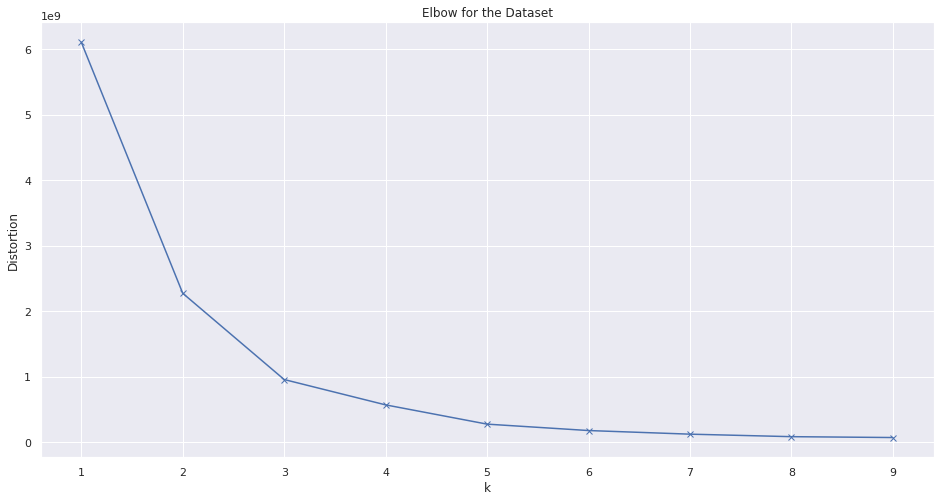

In [570]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_train)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow for the Dataset')
plt.plot(K, distortions, 'bx-')
savePlt(plt, "statlogElbow")

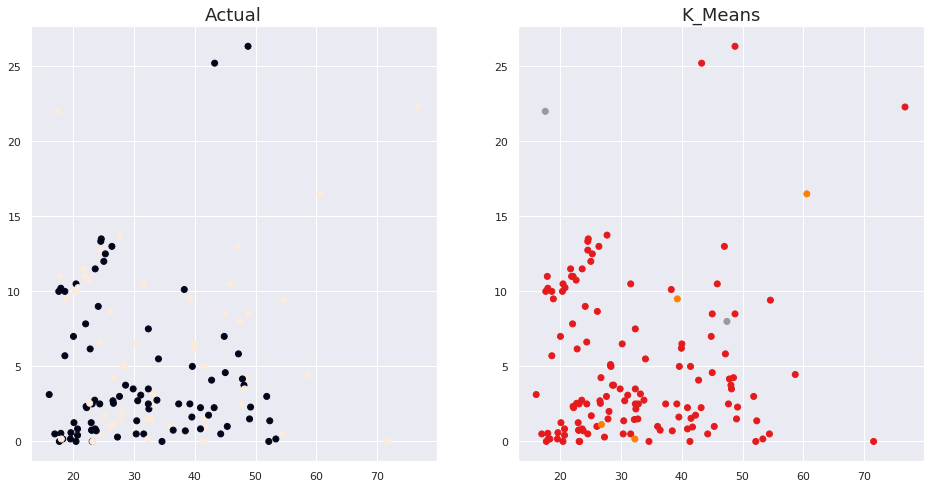

In [571]:
t = kmeanModel = KMeans(n_clusters=3)
t = kmeanModel.fit(X_train)

k_means=kmeanModel.predict(X_test)
target=y_test
fig, axes = plt.subplots(1, 2, figsize=(16,8))
t = axes[0].scatter(X_test["A2"], X_test["A3"], c=target)
t = axes[1].scatter(X_test["A2"], X_test["A3"], c=k_means, cmap=plt.cm.Set1)
t = axes[0].set_title('Actual', fontsize=18)
t = axes[1].set_title('K_Means', fontsize=18)

savePlt(plt, "statlogKMeans")

## Connect-4 game Dataset

In [594]:
df = pd.read_csv("./DSFA/Connect-4/connect-4.data")

In [595]:
df.head()

,b,b.1,b.2,b.3,b.4,b.5,b.6,b.7,b.8,b.9,...,b.25,b.26,b.27,b.28,b.29,b.30,b.31,b.32,b.33,win
0,b,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,win
1,b,b,b,b,b,b,o,b,b,b,...,b,b,b,b,b,b,b,b,b,win
2,b,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,win
3,o,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,win
4,b,b,b,b,b,b,b,b,b,b,...,b,b,b,o,b,b,b,b,b,win


In [596]:
df = df.apply(mapFeature)

In [597]:
X = df.iloc[:,:-1]

In [598]:
y = df.iloc[:, -1]

In [599]:
X_train, X_test, y_train, y_test = split(X, y, test_size=0.2, random_state=42)

In [600]:
X_train

,b,b.1,b.2,b.3,b.4,b.5,b.6,b.7,b.8,b.9,...,b.24,b.25,b.26,b.27,b.28,b.29,b.30,b.31,b.32,b.33
12496,2,1,0,0,0,0,2,0,0,0,...,0,0,0,0,1,2,1,0,0,0
38864,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,1,0,0,0,0
39668,0,0,0,0,0,0,2,1,0,0,...,0,0,0,0,2,1,1,0,0,0
21723,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
54840,2,0,0,0,0,0,2,0,0,0,...,0,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,2,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6265,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,2,1,0,0,0
54886,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,2,0,0,0,0,0
860,2,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [601]:
y_train

12496    0
38864    0
39668    0
21723    0
54840    2
        ..
37194    1
6265     2
54886    0
860      0
15795    2
Name: win, Length: 54044, dtype: int64

### Neighbour tuning

In [603]:
score = accuracy_score

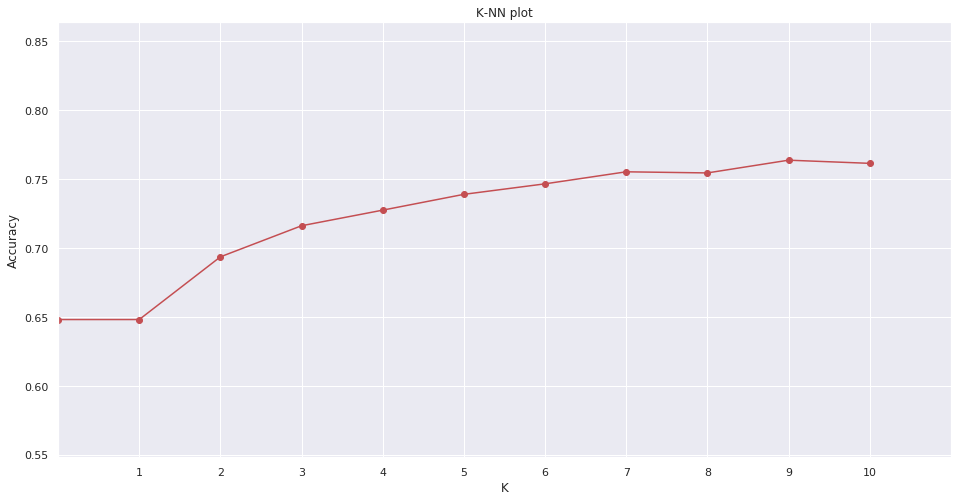

In [602]:
plotKNN(KNNC, score, X_train, y_train, X_test, y_test)
savePlt(plot=plt, name="connect4KNN")

## RESULT

In [606]:
models = [
        {"name": "KNN", "params": {"n_jobs": -1, "n_neighbors": 9}},
        {"name": "NB", "params": {"random_state": 42}},
        {"name": "DT", "params": {"random_state": 42}},
        {"name": "RF", "params": {"n_estimators": len(X_train.columns)*1.2, "random_state": 42}}
]
results = getModelTimeAndAccuracies(
    models,
    score,
    X_train, y_train, X_test, y_test)

In [607]:
printResults(results, models)

KNN: 73.90%, 17.0243s
NB: 60.17%, 0.0401s
DT: 73.71%, 0.1784s
RF: 81.08%, 4.1827s


## Clustering

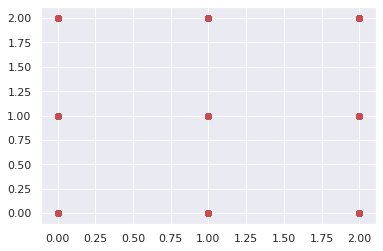

In [609]:
t = plt.scatter(X_test["b.28"], X_test["b"], color="r")

#### NOTE: This is a good example of why everything can't be clustered in case previous clusters weren't enough though KModes is better suited for this task

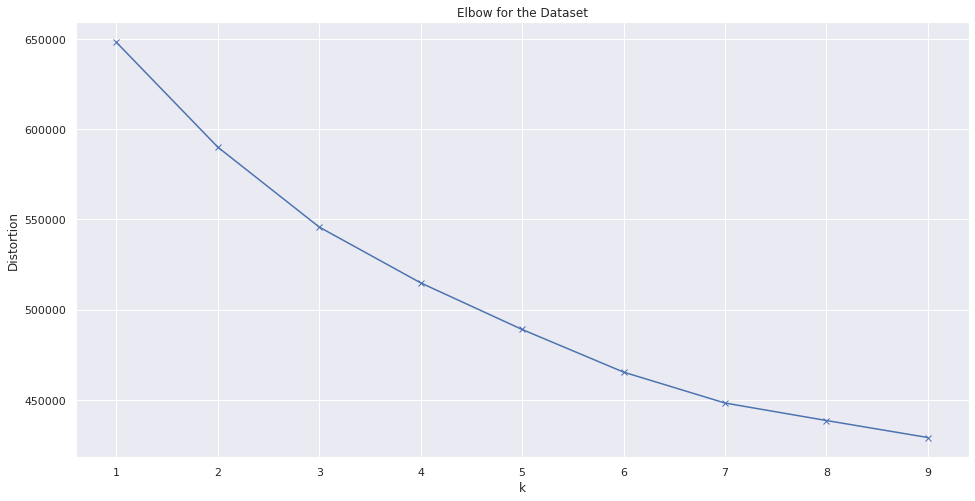

In [611]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_train)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow for the Dataset')
plt.plot(K, distortions, 'bx-')
savePlt(plt, "connect4Elbow")

**The elbow barely bends at 2**

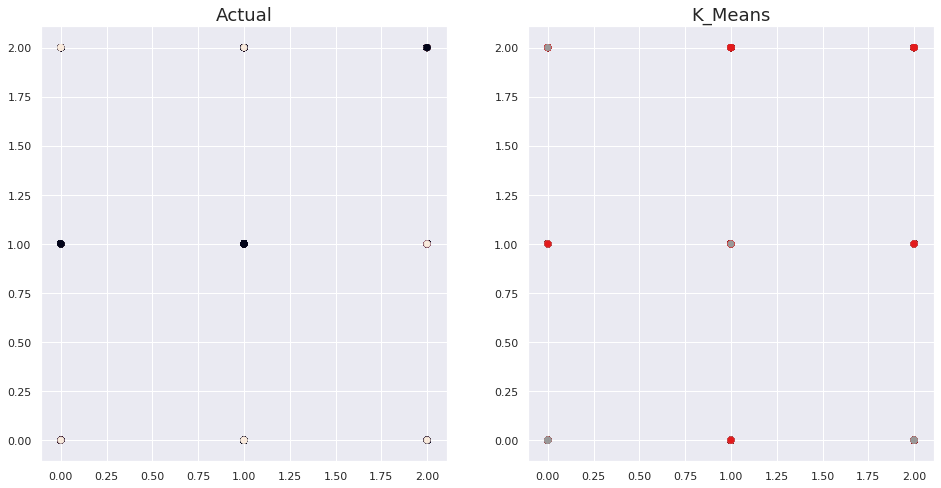

In [612]:
t = kmeanModel = KMeans(n_clusters=2)
t = kmeanModel.fit(X_train)

k_means=kmeanModel.predict(X_test)
target=y_test
fig, axes = plt.subplots(1, 2, figsize=(16,8))
t = axes[0].scatter(X_test["b.28"], X_test["b"], c=target)
t = axes[1].scatter(X_test["b.28"], X_test["b"], c=k_means, cmap=plt.cm.Set1)
t = axes[0].set_title('Actual', fontsize=18)
t = axes[1].set_title('K_Means', fontsize=18)

savePlt(plt, "connect4KMeans")